# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:

* year: 2016 para todos los puntos de datos
* month: número para el mes del año
* day: número del día del año
* week: día de la semana como cadena de carácteres
* temp_2: temperatura máxima 2 días antes
* temp_1: temperatura máxima 1 día antes
* average: temperatura máxima media histórica
* actual: temperatura máxima medida
* friend: la predicción de su amigo, un número aleatorio entre 20 por debajo de la media y 20 por encima de la media

### 1. Importa el csv "temps.csv"

In [1]:
import numpy as np
import os
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd

In [2]:
temps = pd.read_csv("data/temps.csv", sep=",")

### 2. Lidia con las variables categóricas del dataset

In [3]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
temps.week.unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [6]:
temp_dummie = pd.get_dummies(temps,columns=["week"])

In [7]:
temp_dummie.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')

<AxesSubplot:>

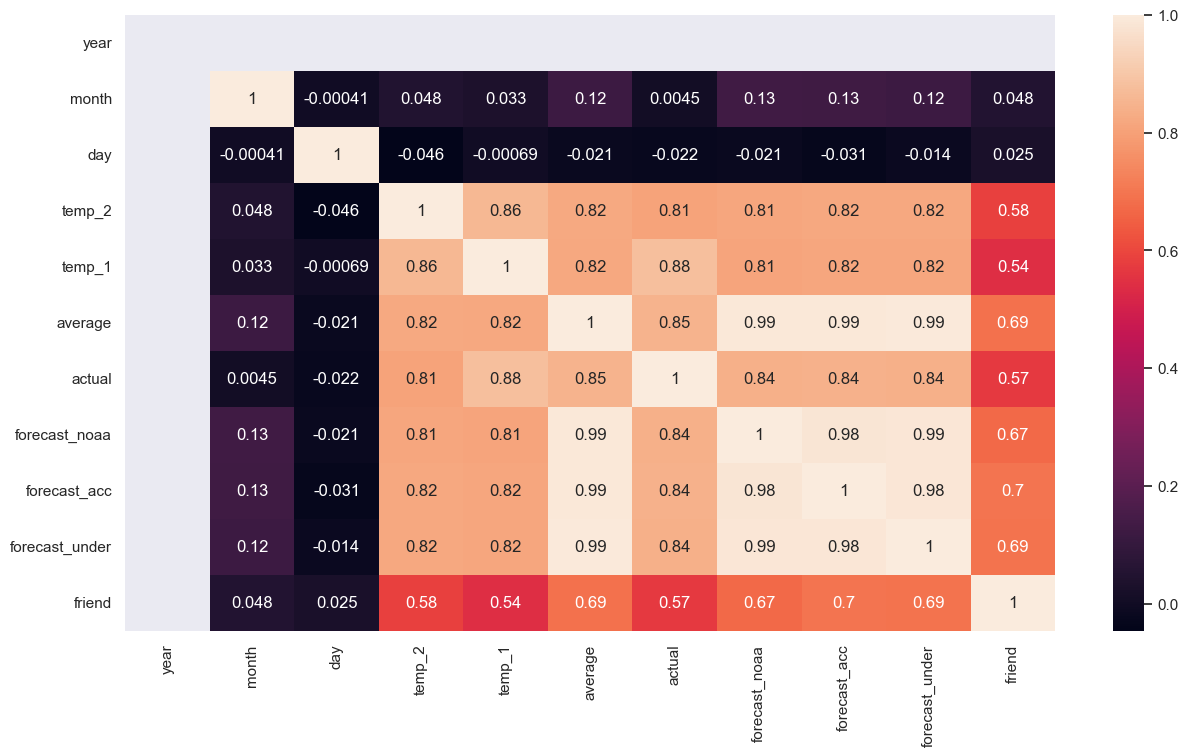

In [8]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(temps.corr(), annot=True)

### 3. Divide en train y test

In [9]:
x = temps[["temp_2","temp_1","average","forecast_noaa"]]
y = temps[["actual"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 4)
(70, 4)
(278, 1)
(70, 1)


### 4. Entrena el modelo


In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
arbolito = DecisionTreeRegressor()
arbolito.fit(X_train, y_train)


DecisionTreeRegressor()

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [12]:
y_pred = arbolito.predict(X_test)
y_pred

array([67., 68., 51., 68., 70., 76., 79., 90., 63., 69., 68., 67., 41.,
       59., 71., 57., 63., 59., 52., 65., 59., 57., 67., 60., 63., 48.,
       59., 45., 60., 79., 66., 64., 57., 90., 80., 60., 54., 53., 67.,
       45., 77., 59., 81., 40., 59., 76., 51., 71., 51., 41., 45., 41.,
       63., 63., 74., 61., 55., 57., 60., 57., 70., 51., 59., 71., 63.,
       59., 71., 67., 75., 41.])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7187306609997315
MAE 4.728571428571429
MAPE 0.07376862285616909
MSE 39.32857142857143
RMSE 6.271249590677398


In [14]:
y_pred_train = arbolito.predict(X_train)

In [15]:
print('Coeficiente determinación', r2_score(y_train, y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_pred_train))
print('MSE', mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

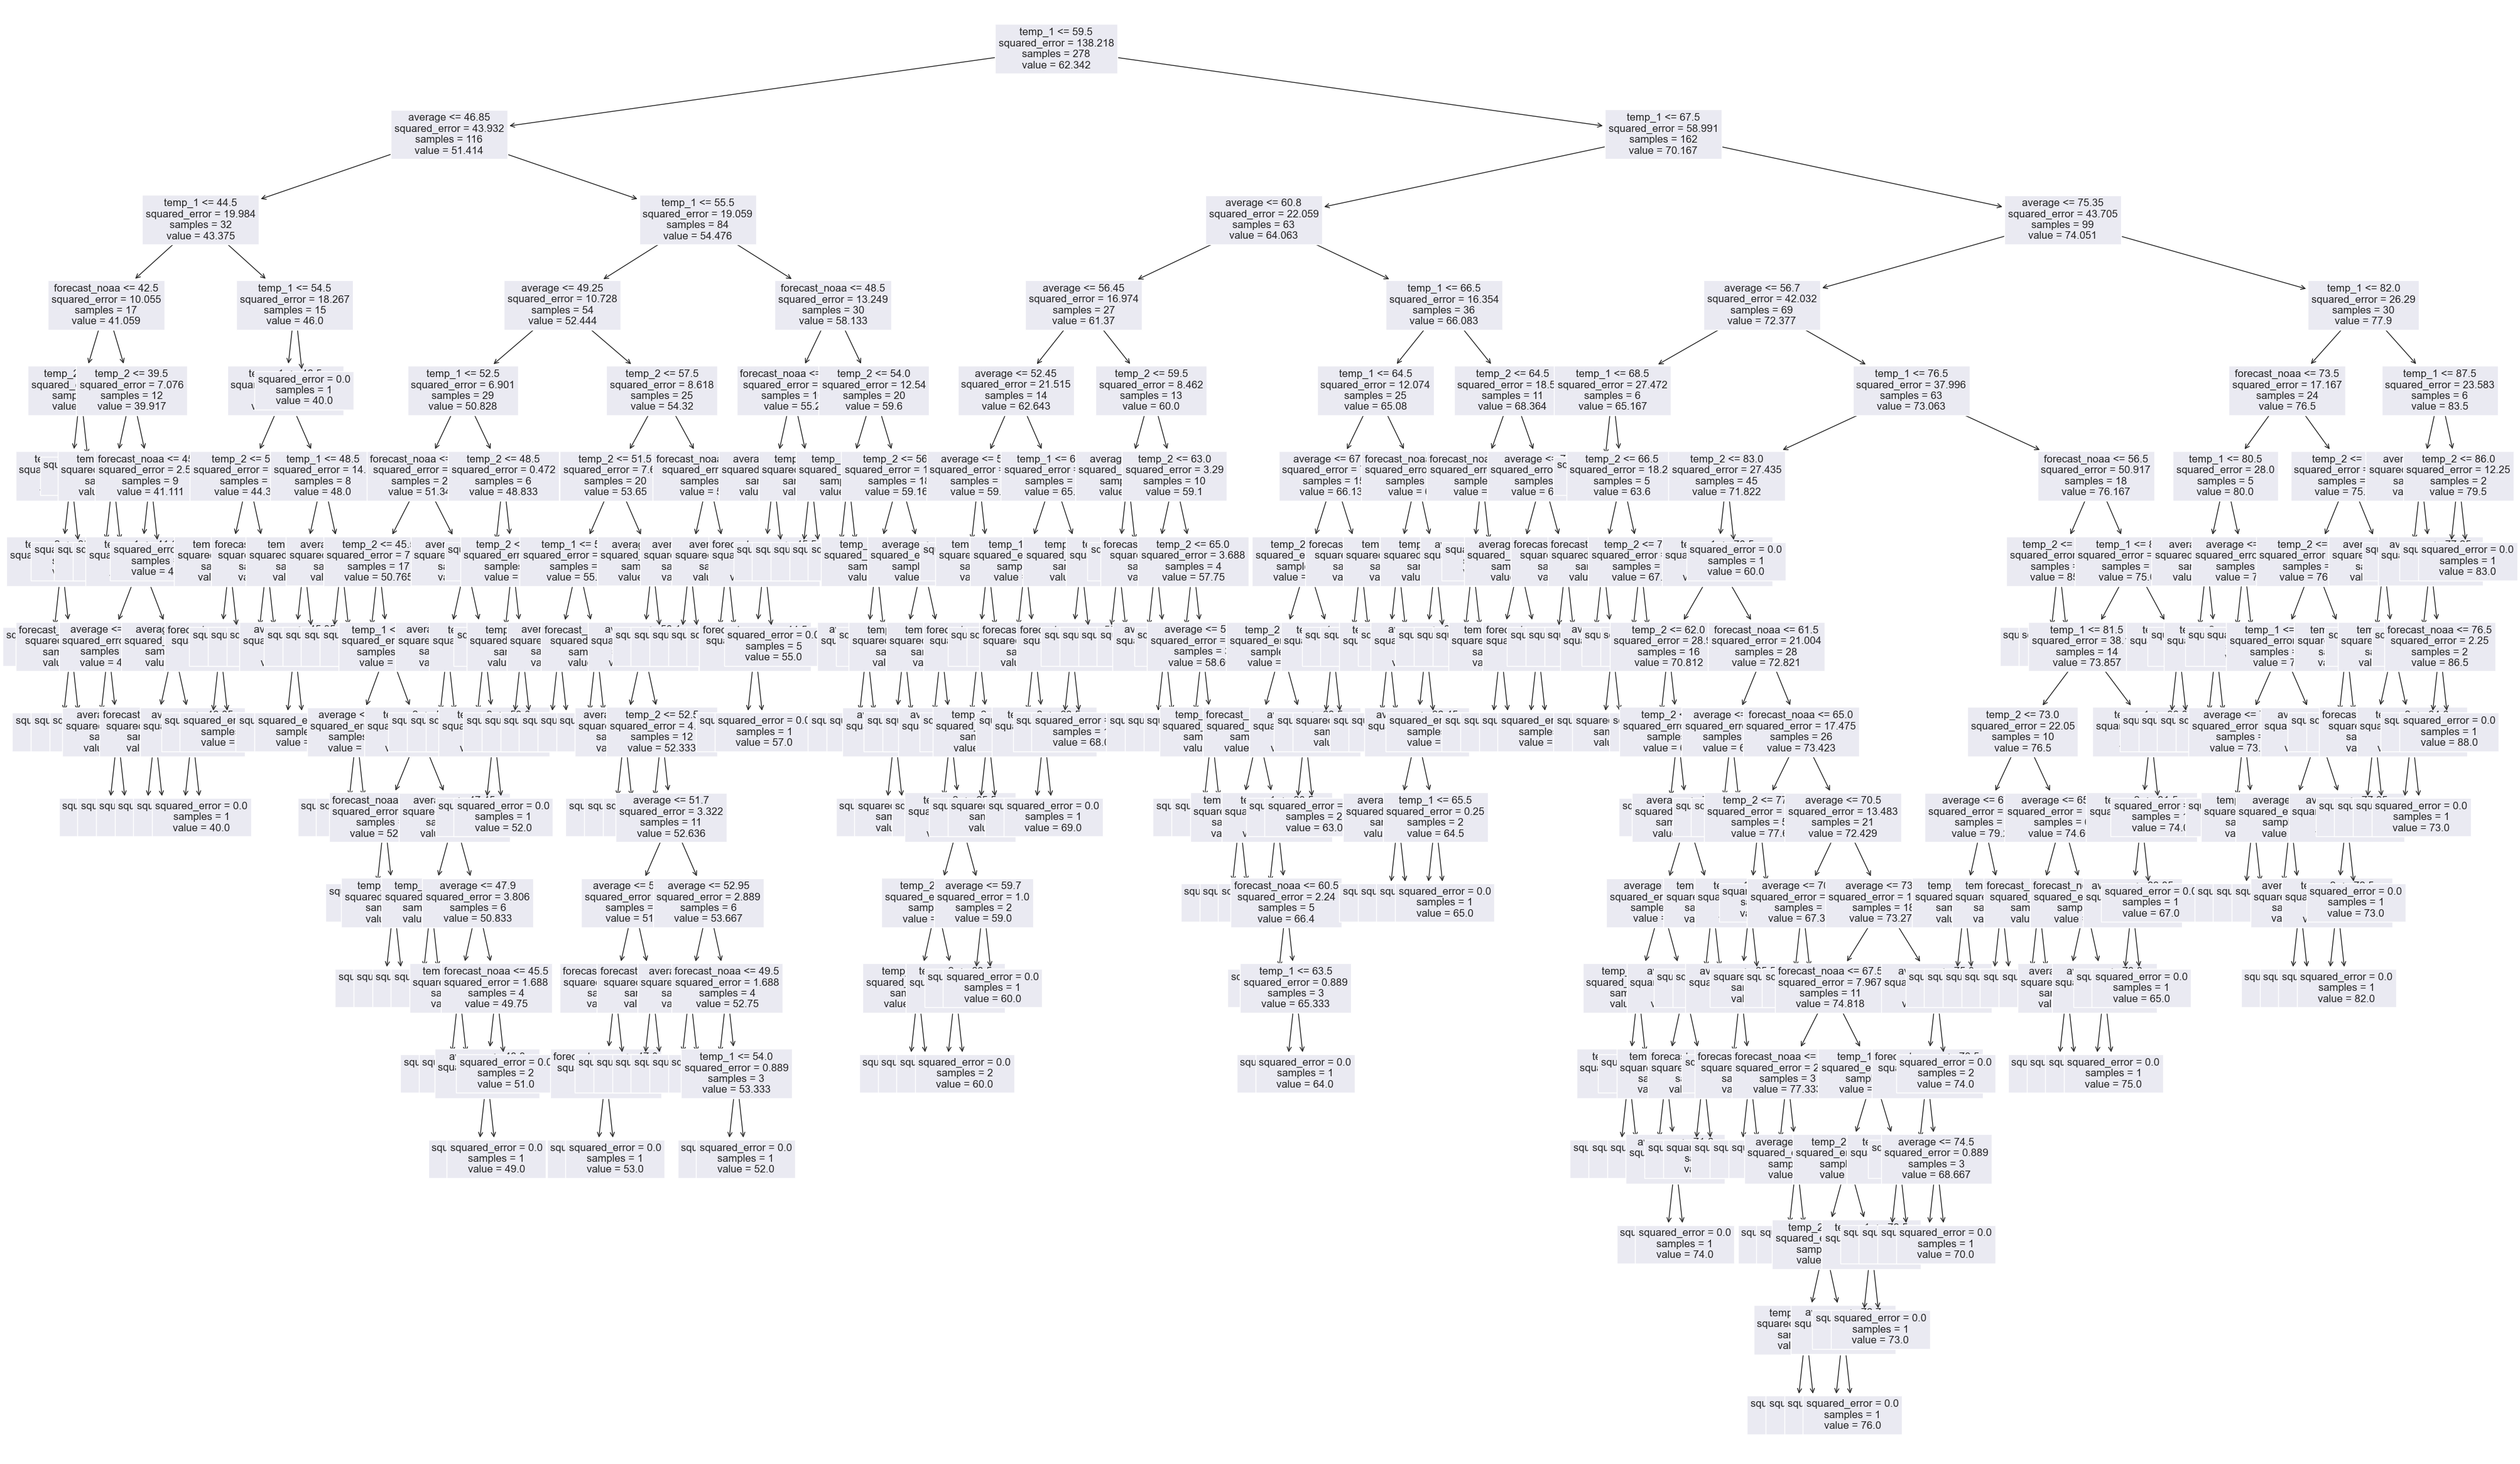

In [16]:
plt.figure(figsize=(50,30))

plot_tree(arbolito, feature_names=X_train.columns, fontsize=12);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [17]:
from sklearn.tree import DecisionTreeRegressor
arbolito_3 = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
arbolito_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [18]:
y_pred = arbolito_3.predict(X_test)
y_pred

array([72.37681159, 61.37037037, 52.44444444, 66.08333333, 66.08333333,
       72.37681159, 77.9       , 77.9       , 61.37037037, 72.37681159,
       61.37037037, 72.37681159, 41.05882353, 61.37037037, 72.37681159,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.37681159,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 77.9       ,
       72.37681159, 66.08333333, 58.13333333, 77.9       , 77.9       ,
       61.37037037, 52.44444444, 52.44444444, 72.37681159, 46.        ,
       72.37681159, 52.44444444, 72.37681159, 41.05882353, 61.37037037,
       72.37681159, 52.44444444, 77.9       , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.37681159,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.37681159, 61.37037037,
       58.13333333, 72.37681159, 72.37681159, 77.9       , 41.05

In [19]:
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7786776796296856
MAE 4.267242249556827
MAPE 0.0674392768128964
MSE 30.946461197509944
RMSE 5.5629543587476915


In [20]:
y_pred_train = arbolito_3.predict(X_train)

In [21]:
print('Coeficiente determinación', r2_score(y_train, y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_pred_train))
print('MSE', mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente determinación 0.8397458755018086
MAE 3.675752083754991
MAPE 0.05874668452706153
MSE 22.14996536445183
RMSE 4.706374970659672


### 9. Vuelve a representar su árbol

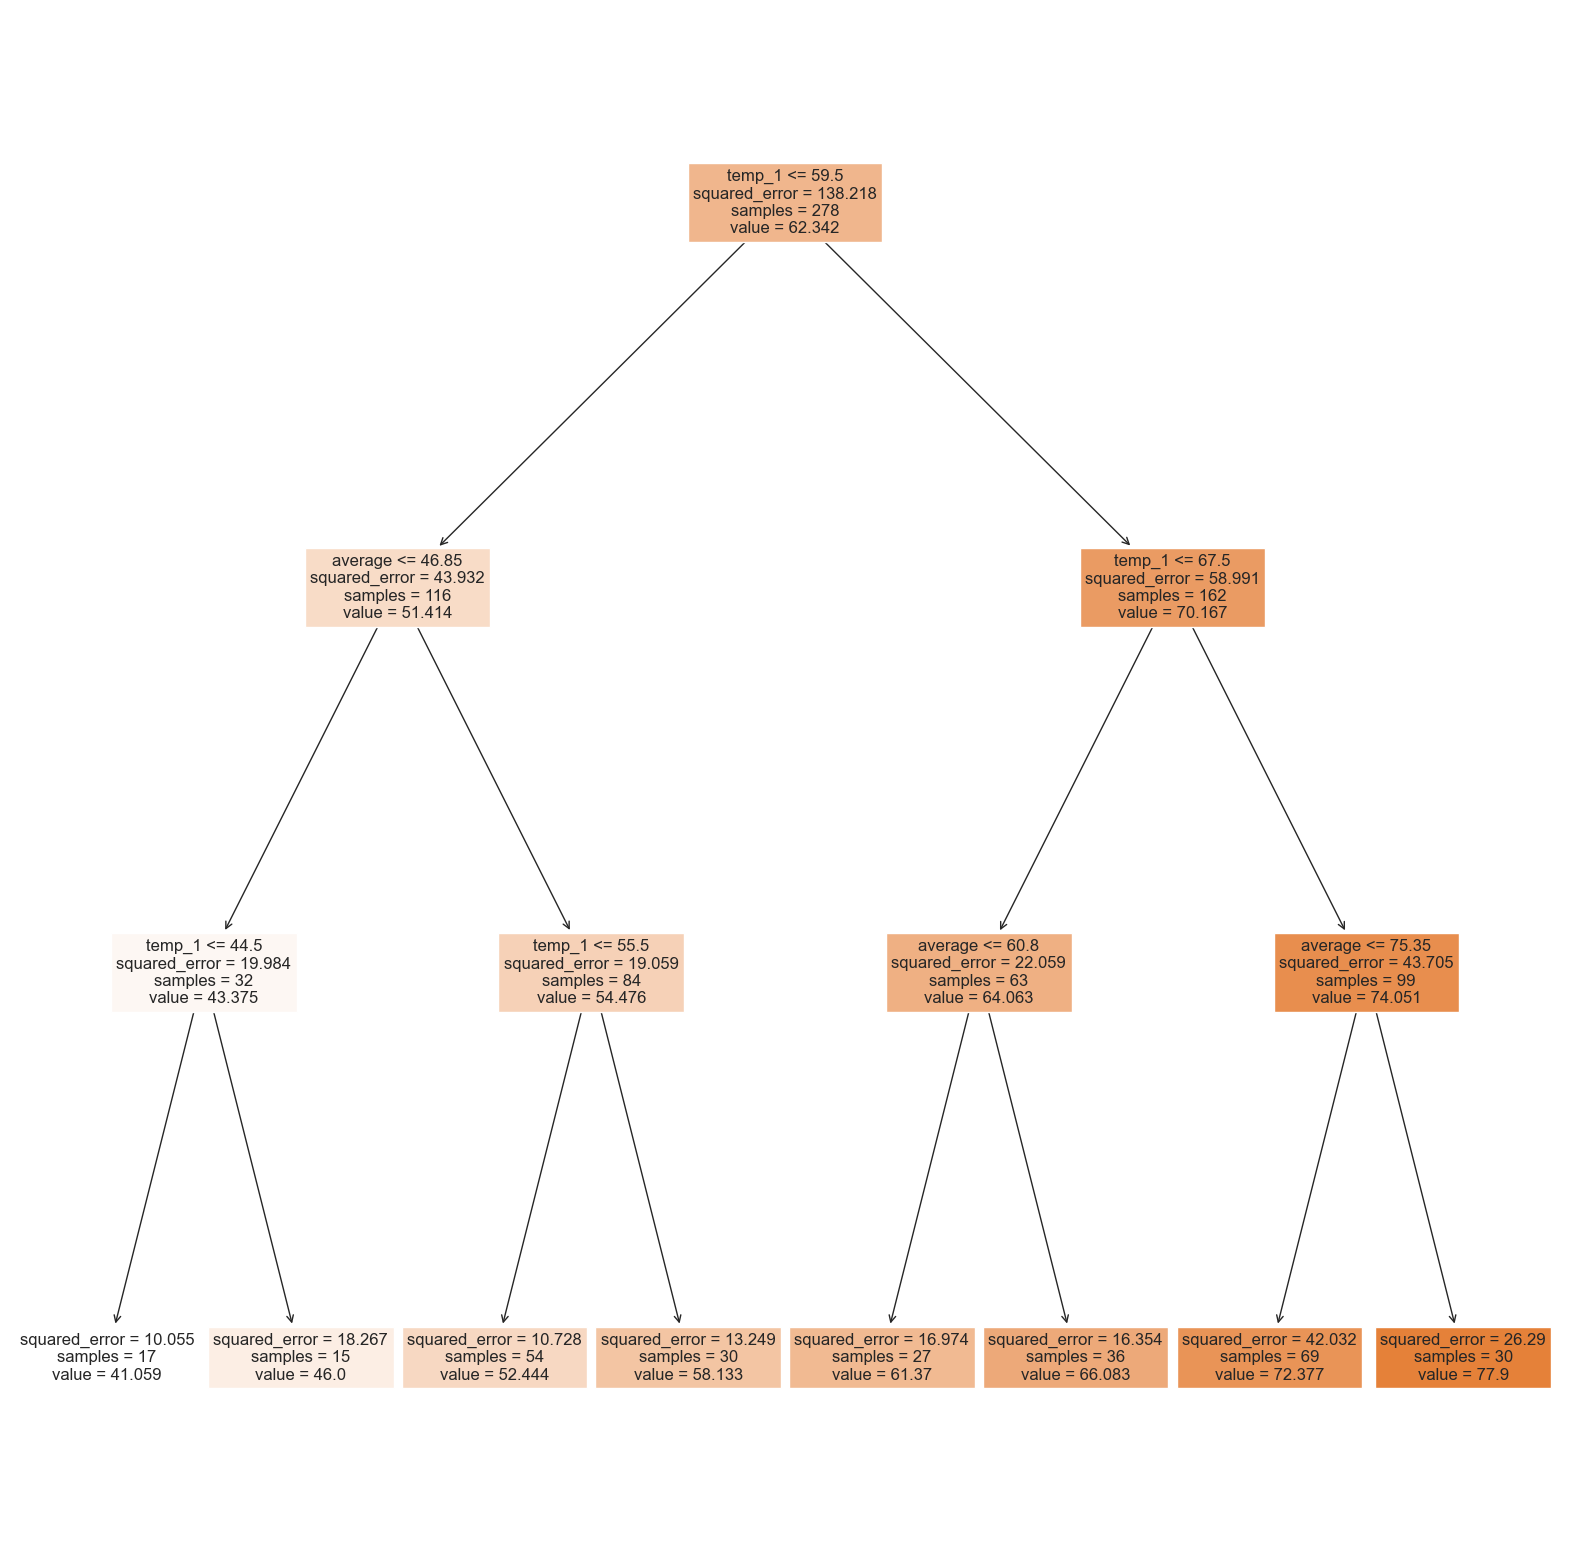

In [22]:
plt.figure(figsize=(20,20))

plot_tree(arbolito_3, feature_names=X_train.columns, class_names='actual', fontsize=12, filled=True);

### 10. Utiliza un grid search con cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

parameters = {'max_depth' : [2,3,4,5],
              'criterion' : ['squared_error', 'absolute_error'],
              'min_samples_split' : [2,5,10,15],
              'min_samples_leaf': [2,4,6,8,10],
              'max_features': [1,2,3,4]
            }

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error')

dtr_gs.fit(X_train, y_train)

In [ ]:
dtr_gs.best_params_

In [ ]:
dtr_gs.best_estimator_

In [ ]:
dtr_gs.best_score_

In [ ]:
dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error')

dtr_gs.fit(X, y)

In [ ]:
dtr_gs.best_params_

In [ ]:
dtr_gs.best_estimator_

In [ ]:
dtr_gs.best_score_

In [ ]:
# 1º Modelo
modelo_1 = DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_leaf=8)
modelo_1.fit(X_train, y_train)

# 2º Modelo
modelo_2 = DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_leaf=4)
modelo_2.fit(X_train, y_train)

In [ ]:
y_pred = modelo_1.predict(X_test)
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
y_pred = modelo_2.predict(X_test)
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(modelo_1, X, y, cv=10, scoring = 'neg_mean_absolute_error')

results

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [ ]:
modelo_1.feature_importances_

In [ ]:
pd.DataFrame({'features':X_train.columns, 'importances':modelo_1.feature_importances_}).sort_values(by='importances', ascending=False)

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [ ]:
df['target_class'] = np.where(df['actual']>59, 1, 0)
df.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['target_class'].value_counts(normalize=True)

In [ ]:
X = df[['temp_1','average','forecast_noaa','friend']]
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

In [ ]:
parameters = {'max_depth' : [2,3,4,5],
              'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2,5,10,15],
              'min_samples_leaf': [2,4,6,8,10],
              'max_features': [1,2,3,4]
            }

model = DecisionTreeClassifier()

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

dtr_gs.fit(X, y)

In [ ]:
dtr_gs.best_estimator_

In [ ]:
dtr = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=1,
                       min_samples_leaf=4, min_samples_split=5)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

In [ ]:
results = cross_val_score(dtr, X, y, cv=10, scoring = 'accuracy')

results.mean()

In [ ]:
results

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)